# Linear regression model

## Fit an interpretable linear regression model and make global and local interpretations

The idea is to fit an interpretable linear regression model, evaluate the model fit and the coefficients, and then interpret the predictions globally and locally.

The workflow is the following:

- Identify variables that are correlated with the target.
- Identify and remove high multi-colinearity among the predictors.
- Fit a linear model with the highest performance and least number of features
- Evaluate the model fit
- Evaluate the coefficients (global interpretation)
- Evaluate a few observations individually (local interpretation)

In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Prepare house price data

In [2]:
# load dataset

data = pd.read_csv('../../houseprice_prep.csv')

data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,MiscFeature_Shed,SaleType_COD,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare
0,65.0,8450,7,5,5,5,196.0,4,3,4,...,0,0,0,0,1,0,0,1,0,0
1,80.0,9600,6,8,31,31,0.0,3,3,4,...,0,0,0,0,1,0,0,1,0,0
2,68.0,11250,7,5,7,6,162.0,4,3,4,...,0,0,0,0,1,0,0,1,0,0
3,60.0,9550,7,5,91,36,0.0,3,3,3,...,0,0,0,0,1,1,0,0,0,0
4,84.0,14260,8,5,8,8,350.0,4,3,4,...,0,0,0,0,1,0,0,1,0,0


In [3]:
# Separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['SalePrice'], axis=1), # predictive variables
    data['SalePrice'], # target
    test_size=0.1, # portion of dataset to allocate to test set
    random_state=0, # we are setting the seed here
)

X_train.shape, X_test.shape

((1314, 204), (146, 204))

In [4]:
# Scale data

scaler = StandardScaler().set_output(transform="pandas").fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Make target normally distributed

y_train = np.log(y_train)
y_test = np.log(y_test)

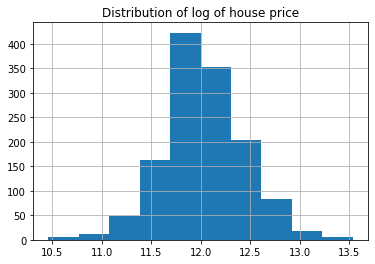

In [6]:
# Plot target variable

y_train.hist()
plt.title("Distribution of log of house price")
plt.show()

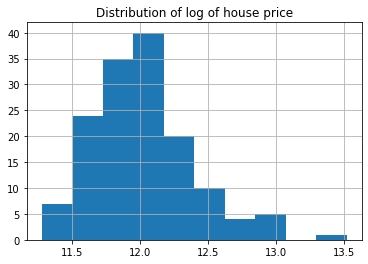

In [7]:
y_test.hist()
plt.title("Distribution of log of house price")
plt.show()

## Variable Distribution

Plot histograms of all continuous variables. 

Consider variables as continuous if they have more than 2 unique values. Otherwise, they are binary.

## Correlation with the target

Remove variables that have little linear association with the target. 

Use Pearson's correlation coefficient to determine the association. 

Remove variables whose absolute correlation coefficient is smaller than 0.1.

## Evaluate multicolinearity

Utilizing solely the variables that exhibit a correlation coefficient greater than 0.1, as mentioned in the previous item, assess the correlations among all features within the dataset.

## Remove multicolinearity 

Identify groups of variables that are correlated and retain the one with the greatest variability.

## Fit an interpretable linear model

Using Lasso, train the model that performs the best and has the least number of features.

If you get errors, reduce the penalization.

## Fit model and evaluate fit

Fit a linear model with a penalization of 0.04 and determine if it is a good fit to the data.

## Evaluate the model globally

Let's now try to interpret the model globally. For this we need to determine:

- Coefficient magnitude and sign
- Coefficient significance (t statistic and p-value)
- Effects plot

Determine the coefficient's error using cross-validation.

### Calculate the t-statistic and p-value for each coefficient

### Find non significant coefficients

Identify coefficients with p-value greater than 0.05

### Global interpretability

Plot the magnitude and sign of the coefficients, the coefficient's absolute value and the t, draw some conclusions.

### Effect plots

Draw the effects plot.

## Local interpretability

Compare the prediction of the model with the real price and then interpret the contribution of each variable towards its final price.

Find how the observation compares with the rest of the observations in the test set.

Evaluate the following rows (they are from the test set):

- #1000
- #224
- #491